Hola soy un cuardeno jupyter

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_dir = 'C:/Users/espin/python_project/machine-learning/data/1.1.5_Titanic.csv'

titanic_df = pd.read_csv(df_dir, sep=",")
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**Tabla Descripción de Campos DatasetTitanic**

| Campo | Descripción | Clasificación |
|-------|-------------|---------------|
|PassengerId|Trae el id del pasajero|Categorico Ordinal int(64)|
|Survived|Indica si el pasajero sobrevivio|Caregotico Nominalint(64)|
|Pclass|Trae la clase en cual viajaba el pasajero|Categorico Ordinal int(64)|
|Name|Describe los datos del pasajero pasajero|Categorigho Nominal object|
|Sex|Muestra el sexo del pasajero|Categorico Nominal object|
|Age|Muestra la edad del pasajero|Numerico Continuo Float(64)|
|SibsSp|Numero de hermanos y esposo |Numerico Discreto int(64)|
|Parch|numero de padres e hijos|Numerico Discreto int(64)|
|Ticket|Trae el numero del ticket de cada pasajerto|Categorico Nominal object|
|Fare|Trae el valor de cada boleto del pasajero|Numerico Continuo Float(64)|
|Cabin|Muestra la cabina|Categorico Nominal Object|
|Embarked|Muestra la cabina de embarque|Categorico Ordinal Object|

**Uso de type**

In [8]:
numerical_columns= df.select_dtypes(include=["number"]).columns
categorical_columns = df.select_dtypes(include=["object","category"]).columns
temporal_columns = df.select_dtypes(include=["datetime"]).columns

**Identificar los datos faltantes o anómalos**

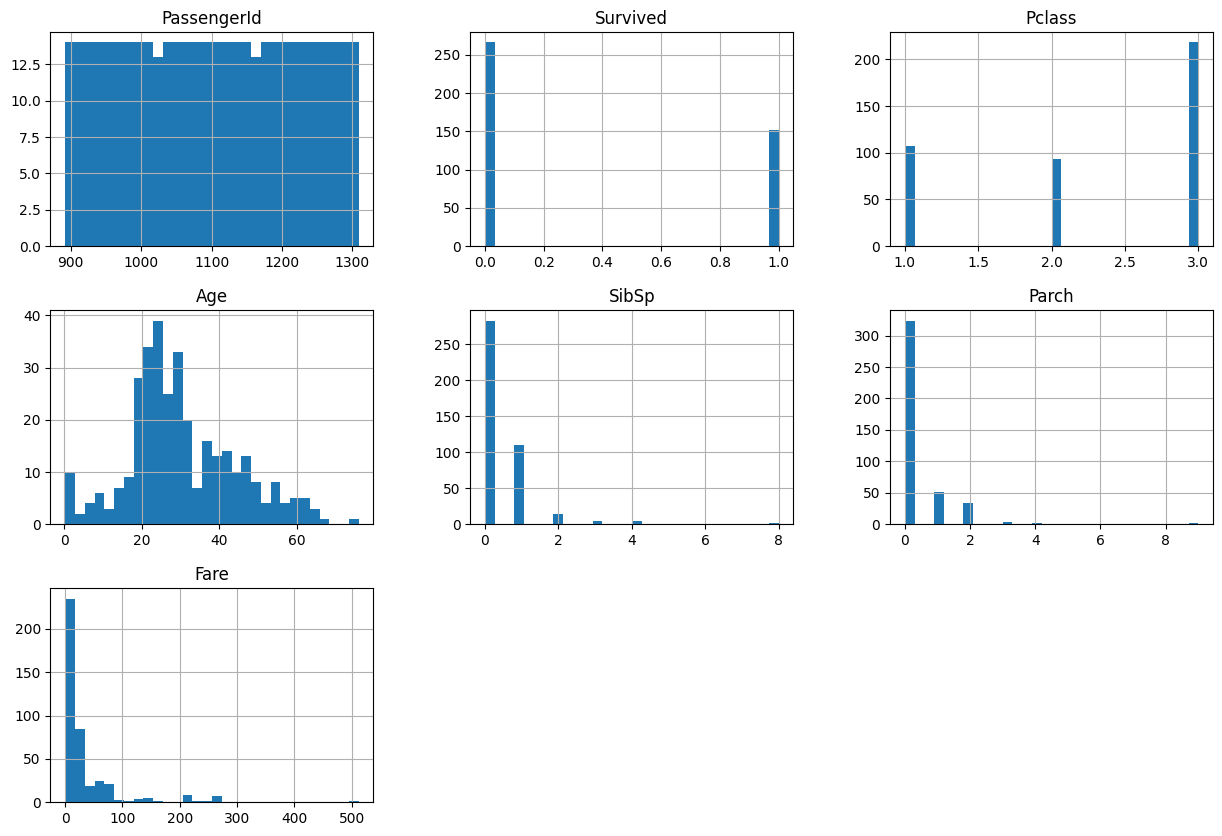

In [10]:
# Boxplot para detectar outliers en una variable numérica
# sns.boxplot(x=titanic_df["Sex"])
# plt.show()

# Histograma para cada columna numérica en el DataFrame
titanic_df.hist(bins=30, figsize=(15, 10))

plt.show()

**Contar valores**

In [14]:
print(titanic_df['Survived'].value_counts(normalize=True))
print(titanic_df['Pclass'].value_counts())
# Agrupar y contar 
print(titanic_df.groupby(['Pclass', 'Sex']).size())

Survived
0    0.636364
1    0.363636
Name: proportion, dtype: float64
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
Pclass  Sex   
1       female     50
        male       57
2       female     30
        male       63
3       female     72
        male      146
dtype: int64


**Calcular promedio**

In [15]:
print(titanic_df['Age'].mean())
# Agrupar por columna y contar promedio 
print(titanic_df.groupby('Pclass')['Fare'].mean())
print(titanic_df.groupby('Pclass')[['SibSp', 'Parch']].mean())
# Funcion agg para analisis de datos 
print(titanic_df['Age'].agg(['min', 'max', 'mean'])) # Se agregan parametros segun requiera
# Otra forma de agrupar
print(titanic_df.pivot_table('Survived', index='Pclass', aggfunc='mean'))
# Agrupa, compara y promedia
print(titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)].shape[0] / titanic_df.shape[0] * 100)

30.272590361445783
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64
           SibSp     Parch
Pclass                    
1       0.476636  0.383178
2       0.376344  0.344086
3       0.463303  0.417431
min      0.17000
max     76.00000
mean    30.27259
Name: Age, dtype: float64
        Survived
Pclass          
1       0.467290
2       0.322581
3       0.330275
60.526315789473685
